In [33]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from PIL import Image
import pickle

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize = False, one_hot_label=False)

print(x_train.shape) #60000개 데이터, 28*28=784->평탄화된 데이터
print(t_train.shape) #60000개 데이터, 라벨 
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


## 데이터 보기

In [20]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img)) #넘파이 배열을 PIL용 데이터 객체로 변환
    pil_img.show()

# 파일 뜨는거 귀찮아서...
def img_show_mat(img):
    plt.imshow(img)
    plt.show()

5
(784,)
(28, 28)


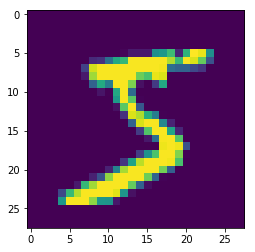

In [21]:
img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show_mat(img)

## 추론 신경망
입력층 노드 784개
출력층 노드 10개

In [24]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def softmax(x):
    m = np.max(x)
    arr = np.exp(x-m)
    return arr/np.sum(arr)

In [34]:
# 데이터를 가져옴
def get_data(): 
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize = False, one_hot_label=False)
    return x_test, t_test

# 신경망 설정
def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

# 추론 신경망
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

## 추론

In [58]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
        
print("Accuracy: " + str(float(accuracy_cnt)/len(x)))

Accuracy: 0.9207


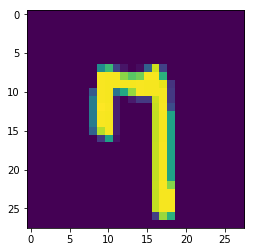

7, 7


In [66]:
k = 80
y = predict(network, x[k])
img_show_mat(x[k].reshape(28,28))
print(f"{t[k]}, {np.argmax(y)}")

## 배치 처리

In [69]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
###########################################################
batch_size = 100

for i in range(0, len(x), batch_size):   #(시작, 끝, 간격)
    x_batch = x[i:i+batch_size]          #i부터 i+batch_size까지의 데이터->[0:100], [100:200], ...
    y_batch = predict(network, x_batch)  #100*10 행렬
    p = np.argmax(y_batch, axis = 1)     #각 행에서 가장 큰 인덱스 -> (100,)
    accuracy_cnt += np.sum(p==t[i:i+batch_size])
##########################################################


print("Accuracy: " + str(float(accuracy_cnt)/len(x)))

Accuracy: 0.9207
